# Sentiment Analysis

In [ ]:
### Read the training data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
%%time
# read in file
df = pd.read_csv('/content/drive/My Drive/95865 Unstructured Data Analytics/HW3/HW3-data/train.csv', sep=",", header=None, encoding='iso8859')

CPU times: user 6.73 s, sys: 354 ms, total: 7.08 s
Wall time: 7.26 s


In [ ]:
df.head(n=3)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


In [ ]:
# Keep only the sentiment and sentiment text in the data
df = df.drop([1,2,3,4], axis=1)

In [ ]:
df.head(n=3)

,0,5
0,1,@BJoiella I think i'm falling in love with you...
1,1,twitterphone is working well fast
2,0,@spiderygirl Whaaat I'm so jealous


In [ ]:
#Shuffle the rows of the data frame such that the positive and negative tweets are mixed
df = df.sample(frac=1).reset_index(drop=True)

# Source: https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows

In [ ]:
# Print the first 5 sentiments.
for i in range(5):
  print(df.iloc[i][5])
  print()

lol so boredd nithing to do someone SAVE ME PLEASE 

@JorDivision You never call me and leave me voicemails of you singing anymore. I miss it 

@madwilliamflint hahahaha that was great 

@urbanphish I'm trying a low-carb. You can eat as much as you want of the other things. It's still miserable, b/c all my favs are carbs. 

Watching the storm from the porch with Brad 



In [ ]:
%%time
#Print the number of positive and negative sentiment labels
# 0 is negative 1 is positive

positive_labels = 0
negative_labels = 0

for i in range(len(df)):
  if df.iloc[i][0] == 0:
    negative_labels +=1
  if df.iloc[i][0] == 1:
    positive_labels +=1


CPU times: user 9min 10s, sys: 118 ms, total: 9min 10s
Wall time: 9min 11s


In [ ]:
train_labels=df[0].tolist()
#train_labels=

In [ ]:
print("number of positive labels " + str(positive_labels))
print("number of negative labels " + str(negative_labels))

number of positive labels 800000
number of negative labels 800000


### Data Preparation

Before building a neural network model, we first need to prepare the data. The input to a RNN model  is a matrix with shape (a, b), where a is the number of samples (tweets), and b is the sequence length of each tweet. Prepare the data with the following steps:

1\. Take the RAW texts of the top 5000 tweets in the data and convert them to a list of strings, where each string is a tweet

In [ ]:
#take top 5000 tweets in the data
# convert to a list of strings
list_of_tweets = []
for i in range(5000):
  tweet = df.iloc[i][5]
  list_of_tweets.append(tweet.rstrip())

In [ ]:
#list_of_tweets[3]

2\. Use `Tokenizer` from `keras.preprocessing.text` to tokenize the texts and convert them to sequences (numbers) with the `texts_to_sequences` method of `Tokenizer`.

In [ ]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [ ]:
#iniitialize tokenizer class. Consider top 10000 words in the dataset
t = Tokenizer(num_words=10000)

In [ ]:
#t.texts_to_sequences(list_of_tweets)

In [ ]:
t.fit_on_texts(list_of_tweets)

#Source: https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/

In [ ]:
encoded_tweets = t.texts_to_sequences(list_of_tweets)

In [ ]:
#len(encoded_tweets)
#type(encoded_tweets)
encoded_tweets[3]

3\. Use `pad_sequences` from `keras.preprocessing.sequence` to pad each sequence with zeros to **make the sequence length 120**.

In [ ]:
# your code here
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(encoded_tweets, maxlen=120)

In [ ]:
x_train.shape[0]

5000

###  Simple RNN

Goal: Build a simple RNN model with the following specification:
1. An embedding layer with output dimenstion 64.
2. A simple RNN layer.
3. A dense layer with sigmoid activation function for prediction.

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SimpleRNN

In [ ]:
#simple rnn model
rnn_model = Sequential()
rnn_model.add(Embedding(10000, 64, input_length=120))
rnn_model.add(SimpleRNN(64))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 64)           640000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 648,321
Trainable params: 648,321
Non-trainable params: 0
_________________________________________________________________


ii) Train the simple RNN model:

1\. Compile the model with binary cross entory as loss and accuracy as evaluation metrics.

In [ ]:
# compile model

rnn_model.compile(optimizer='rmsprop',
                           loss='binary_crossentropy',
                           metrics=['accuracy'])

2\. Fit the model with the training set with 5 epochs (using 20% of the data as validation)

In [ ]:
## train model

history = rnn_model.fit(x_train,
                       train_labels[:5000],
                       validation_split=0.2,
                       epochs=5,
                       batch_size=512)

Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 3s 695us/step - loss: 0.5855 - acc: 0.6240 - val_loss: 0.6342 - val_acc: 0.6540
Epoch 2/5
4000/4000 [==============================] - 3s 745us/step - loss: 0.3788 - acc: 0.9627 - val_loss: 0.6238 - val_acc: 0.6630
Epoch 3/5
4000/4000 [==============================] - 3s 702us/step - loss: 0.2826 - acc: 0.9710 - val_loss: 0.8073 - val_acc: 0.5110
Epoch 4/5
4000/4000 [==============================] - 3s 704us/step - loss: 0.1931 - acc: 0.9692 - val_loss: 0.6237 - val_acc: 0.6730
Epoch 5/5
4000/4000 [==============================] - 3s 688us/step - loss: 0.1397 - acc: 0.9895 - val_loss: 0.6338 - val_acc: 0.6620


3\. Plot the training and validation accuracy across epochs.

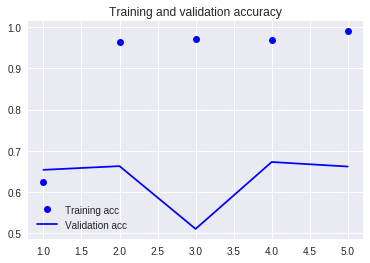

In [ ]:
#plot the accuracy rates for each epoch on training and validation data
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

### LSTM

i) Build LSTM model by replacing the simple RNN layter in the above model with a LSTM layer

In [ ]:
#LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(10000, 64, input_length=120))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 64)           640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


ii) Train the LSTM model with the same specifications in the simple RNN model. Plot the training and validation accuracy across epochs.

In [ ]:
#comple and train model
lstm_model.compile(optimizer='rmsprop',
                           loss='binary_crossentropy',
                           metrics=['accuracy'])

history = lstm_model.fit(x_train,
                       train_labels[:5000],
                       validation_split=0.2,
                       epochs=5,
                       batch_size=512)

Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 9s 2ms/step - loss: 0.6905 - acc: 0.5362 - val_loss: 0.6792 - val_acc: 0.6060
Epoch 2/5
4000/4000 [==============================] - 8s 2ms/step - loss: 0.6574 - acc: 0.6630 - val_loss: 0.6423 - val_acc: 0.6910
Epoch 3/5
4000/4000 [==============================] - 8s 2ms/step - loss: 0.5859 - acc: 0.7485 - val_loss: 0.6065 - val_acc: 0.6460
Epoch 4/5
4000/4000 [==============================] - 8s 2ms/step - loss: 0.5115 - acc: 0.7950 - val_loss: 0.5787 - val_acc: 0.6950
Epoch 5/5
4000/4000 [==============================] - 8s 2ms/step - loss: 0.4240 - acc: 0.8432 - val_loss: 0.5802 - val_acc: 0.6730


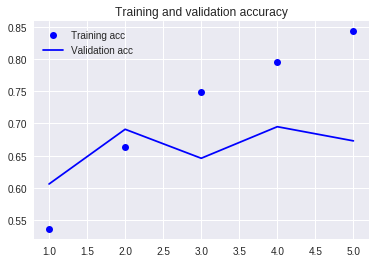

In [ ]:
#plot the accuracy rates for each epoch on training and validation data
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

### Evaluation on test data

In [ ]:
# evalaute RNN and LSTM models on test data

In [ ]:
df2 = pd.read_csv('/content/drive/My Drive/95865 Unstructured Data Analytics/HW3/HW3-data/test.csv', sep=",", header=None, encoding='iso8859')
df2.head(n=3)


,0,1,2,3,4,5
0,1,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,1,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,1,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."


In [ ]:
test_labels = df2[0].tolist()

test_tweets = df2[5].tolist()

In [ ]:
test_tweets_sequences = t.texts_to_sequences(test_tweets)

In [ ]:
x_test = pad_sequences(test_tweets_sequences, maxlen=120)

In [ ]:
# Evaluate performance on test data

test_loss, test_acc = rnn_model.evaluate(x_test, test_labels)
print('Simple RNN Test accuracy:', test_acc)



498/498 [==============================] - 0s 368us/step
Simple RNN Test accuracy: 0.5542168681880077


In [ ]:

test_loss, test_acc = lstm_model.evaluate(x_test, test_labels)
print('LSTM Test accuracy:', test_acc)


498/498 [==============================] - 0s 599us/step
LSTM Test accuracy: 0.5963855428868029


ii) Train with entire dataset instead of onlythe top 5000 tweets. Now train the LSTM-based model using the whole training dataset.

In [ ]:

x_train = df[5].tolist()

train_labels = df[0].tolist()

In [ ]:
t.fit_on_texts(x_train)
encoded_x = t.texts_to_sequences(x_train)

X_train = pad_sequences(encoded_x, maxlen=120)

In [ ]:
%%time

history = lstm_model.fit(X_train,
                       train_labels,
                       validation_split=0.2,
                       epochs=5,
                       batch_size=512)

Train on 1280000 samples, validate on 320000 samples
Epoch 1/5
1280000/1280000 [==============================] - 661s 516us/step - loss: 0.4103 - acc: 0.8122 - val_loss: 0.4019 - val_acc: 0.8161
Epoch 2/5
1280000/1280000 [==============================] - 662s 517us/step - loss: 0.3892 - acc: 0.8241 - val_loss: 0.3912 - val_acc: 0.8228
Epoch 3/5
1280000/1280000 [==============================] - 663s 518us/step - loss: 0.3796 - acc: 0.8291 - val_loss: 0.3873 - val_acc: 0.8249
Epoch 4/5
1280000/1280000 [==============================] - 662s 517us/step - loss: 0.3721 - acc: 0.8334 - val_loss: 0.3830 - val_acc: 0.8274
Epoch 5/5
1280000/1280000 [==============================] - 663s 518us/step - loss: 0.3656 - acc: 0.8371 - val_loss: 0.3810 - val_acc: 0.8286
CPU times: user 1h 11min 19s, sys: 7min 43s, total: 1h 19min 3s
Wall time: 55min 10s


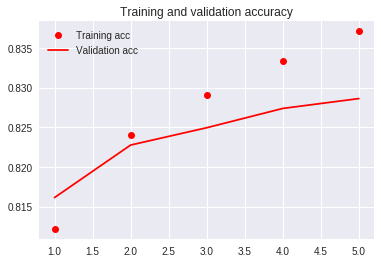

In [ ]:
#plot the accuracy rates for each epoch on training and validation data
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()


In [ ]:
test_loss, test_acc = lstm_model.evaluate(x_test, test_labels)
print('LSTM Test accuracy:', test_acc)


498/498 [==============================] - 1s 3ms/step
LSTM Test accuracy: 0.5180722891566265


Test set accuracy (full data set): **51.8%**

Test set accuracy (500 tweets): **0.52%**